### Import libraries and read data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt

In [2]:
os.chdir('..')
os.getcwd()

'/Users/benmurphy/Library/CloudStorage/OneDrive-Personal/github-projects/rugby/rugby'

In [3]:
raw_df.loc[(raw_df['Home team']=='BENETTON') & (raw_df['Away team']=='LEINSTER')]

NameError: name 'raw_df' is not defined

In [4]:
raw_df = pd.read_csv("0_data/match_data/urc_matches.csv")
raw_df

,match_date_,Home team,Away team,home_n_tries,minutes_of_home_tries,away_n_tries,minutes_of_away_tries,home_n_pen_kicks,minutes_of_home_pen_kicks,away_n_pen_kicks,...,pkey,home_score,away_score,score_diff,home_pack_weight,away_pack_weight,home_forwards_ages,home_backs_ages,away_forwards_ages,away_backs_ages
0,2021-09-24,ZEBRE,LIONS,3.0,51_61_64,5.0,32_19_21_15_10,0.0,NaN,1.0,...,ZEBRE_LIONS_2021-09-24,26,38,-12,924,925,26,26,27,25
1,2021-09-24,CARDIFF,CONNACHT,5.0,38_50_69_9_73,2.0,12_80,0.0,NaN,3.0,...,CARDIFF_CONNACHT_2021-09-24,33,21,12,929,892,28,27,26,26
2,2021-09-24,ULSTER,GLASGOW,4.0,22_43_48_58,3.0,42_14_64,0.0,NaN,1.0,...,ULSTER_GLASGOW_2021-09-24,35,29,6,906,910,29,26,28,26
3,2021-09-25,MUNSTER,SHARKS,5.0,43_50_35_5_78,2.0,56_69,2.0,28_68,1.0,...,MUNSTER_SHARKS_2021-09-25,42,17,25,907,934,28,25,26,24
4,2021-09-25,BENETTON,STORMERS,2.0,15_58,2.0,1_43,1.0,62,2.0,...,BENETTON_STORMERS_2021-09-25,22,18,4,909,899,24,26,27,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,2025-05-17,LEINSTER,GLASGOW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LEINSTER_GLASGOW_2025-05-17,-1,-1,0,-1,-1,-1,-1,-1,-1
593,2025-05-17,BULLS,DRAGONS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BULLS_DRAGONS_2025-05-17,-1,-1,0,-1,-1,-1,-1,-1,-1
594,2025-05-17,LIONS,OSPREYS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LIONS_OSPREYS_2025-05-17,-1,-1,0,-1,-1,-1,-1,-1,-1
595,2025-05-17,ZEBRE,CONNACHT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ZEBRE_CONNACHT_2025-05-17,-1,-1,0,-1,-1,-1,-1,-1,-1


In [5]:
raw_df.dtypes

match_date_                     object
Home team                       object
Away team                       object
home_n_tries                   float64
minutes_of_home_tries           object
away_n_tries                   float64
minutes_of_away_tries           object
home_n_pen_kicks               float64
minutes_of_home_pen_kicks       object
away_n_pen_kicks               float64
minutes_of_away_pen_kicks       object
home_n_conversions             float64
minutes_of_home_conversions     object
away_n_conversions             float64
minutes_of_away_conversions     object
competition                     object
round_stage                     object
pkey                            object
home_score                       int64
away_score                       int64
score_diff                       int64
home_pack_weight                 int64
away_pack_weight                 int64
home_forwards_ages               int64
home_backs_ages                  int64
away_forwards_ages       

In [6]:
matches = raw_df[['match_date_', 'Home team', 'Away team', 'home_n_tries', 'away_n_tries', 'pkey']]

matches.sort_values(by='match_date_')

,match_date_,Home team,Away team,home_n_tries,away_n_tries,pkey
0,2021-09-24,ZEBRE,LIONS,3.0,5.0,ZEBRE_LIONS_2021-09-24
1,2021-09-24,CARDIFF,CONNACHT,5.0,2.0,CARDIFF_CONNACHT_2021-09-24
2,2021-09-24,ULSTER,GLASGOW,4.0,3.0,ULSTER_GLASGOW_2021-09-24
3,2021-09-25,MUNSTER,SHARKS,5.0,2.0,MUNSTER_SHARKS_2021-09-25
4,2021-09-25,BENETTON,STORMERS,2.0,2.0,BENETTON_STORMERS_2021-09-25
...,...,...,...,...,...,...
594,2025-05-17,LIONS,OSPREYS,NaN,NaN,LIONS_OSPREYS_2025-05-17
595,2025-05-17,ZEBRE,CONNACHT,NaN,NaN,ZEBRE_CONNACHT_2025-05-17
592,2025-05-17,LEINSTER,GLASGOW,NaN,NaN,LEINSTER_GLASGOW_2025-05-17
593,2025-05-17,BULLS,DRAGONS,NaN,NaN,BULLS_DRAGONS_2025-05-17


### Data manipulation 
- we need to reshape our dataframe so that both the home and the away team have a row each and an indicator whether they are playing at home or away

In [7]:
common_features = ['pkey', 'match_date_', 'Home team', 'Away team']

# home data
temp1 = matches[common_features+['home_n_tries']]
temp1['Team Location'] = "Home Team"
temp1.rename(columns={"Home team": "Team",
                    "Away team": "Opponents",
                    "home_n_tries": "Tries Scored"},
                    inplace=True)

# away data
temp2 = matches[common_features + ['away_n_tries']]
temp2['Team Location'] = "Away Team"
temp2.rename(columns={"Away team": "Team",
                    "Home team": "Opponents",
                    "away_n_tries": "Tries Scored"},
                    inplace=True)

# concat dfs together
team_per_row_df = pd.concat([temp1, temp2])
team_per_row_df.reset_index(inplace=True, drop=True)

team_per_row_df.rename(columns={"match_date_": "Match Date",
                    "pkey": "Primary Key"},
                    inplace=True)

team_per_row_df['Match Date'] = pd.to_datetime(team_per_row_df['Match Date'])

del(temp1)
del(temp2)

team_per_row_df

,Primary Key,Match Date,Team,Opponents,Tries Scored,Team Location
0,ZEBRE_LIONS_2021-09-24,2021-09-24,ZEBRE,LIONS,3.0,Home Team
1,CARDIFF_CONNACHT_2021-09-24,2021-09-24,CARDIFF,CONNACHT,5.0,Home Team
2,ULSTER_GLASGOW_2021-09-24,2021-09-24,ULSTER,GLASGOW,4.0,Home Team
3,MUNSTER_SHARKS_2021-09-25,2021-09-25,MUNSTER,SHARKS,5.0,Home Team
4,BENETTON_STORMERS_2021-09-25,2021-09-25,BENETTON,STORMERS,2.0,Home Team
...,...,...,...,...,...,...
1189,LEINSTER_GLASGOW_2025-05-17,2025-05-17,GLASGOW,LEINSTER,NaN,Away Team
1190,BULLS_DRAGONS_2025-05-17,2025-05-17,DRAGONS,BULLS,NaN,Away Team
1191,LIONS_OSPREYS_2025-05-17,2025-05-17,OSPREYS,LIONS,NaN,Away Team
1192,ZEBRE_CONNACHT_2025-05-17,2025-05-17,CONNACHT,ZEBRE,NaN,Away Team


In [8]:
team_per_row_df.sort_values(by='Match Date')

,Primary Key,Match Date,Team,Opponents,Tries Scored,Team Location
0,ZEBRE_LIONS_2021-09-24,2021-09-24,ZEBRE,LIONS,3.0,Home Team
599,ULSTER_GLASGOW_2021-09-24,2021-09-24,GLASGOW,ULSTER,3.0,Away Team
598,CARDIFF_CONNACHT_2021-09-24,2021-09-24,CONNACHT,CARDIFF,2.0,Away Team
597,ZEBRE_LIONS_2021-09-24,2021-09-24,LIONS,ZEBRE,5.0,Away Team
2,ULSTER_GLASGOW_2021-09-24,2021-09-24,ULSTER,GLASGOW,4.0,Home Team
...,...,...,...,...,...,...
594,LIONS_OSPREYS_2025-05-17,2025-05-17,LIONS,OSPREYS,NaN,Home Team
593,BULLS_DRAGONS_2025-05-17,2025-05-17,BULLS,DRAGONS,NaN,Home Team
592,LEINSTER_GLASGOW_2025-05-17,2025-05-17,LEINSTER,GLASGOW,NaN,Home Team
1192,ZEBRE_CONNACHT_2025-05-17,2025-05-17,CONNACHT,ZEBRE,NaN,Away Team


In [9]:
# filter out any future fixtures, only keep historical results
today = dt.datetime.today()

df = team_per_row_df.loc[team_per_row_df['Match Date'] < today]

df = df.sort_values(by=['Match Date', 'Team Location'], ascending=[True, False])

df = df.reset_index(drop=True)

df.tail(16)

,Primary Key,Match Date,Team,Opponents,Tries Scored,Team Location
966,SCARLETS_BULLS_2024-10-18,2024-10-18,SCARLETS,BULLS,3.0,Home Team
967,ULSTER_OSPREYS_2024-10-18,2024-10-18,ULSTER,OSPREYS,6.0,Home Team
968,SCARLETS_BULLS_2024-10-18,2024-10-18,BULLS,SCARLETS,3.0,Away Team
969,ULSTER_OSPREYS_2024-10-18,2024-10-18,OSPREYS,ULSTER,2.0,Away Team
970,DRAGONS_BENETTON_2024-10-19,2024-10-19,DRAGONS,BENETTON,3.0,Home Team
971,SHARKS_GLASGOW_2024-10-19,2024-10-19,SHARKS,GLASGOW,3.0,Home Team
972,CONNACHT_LEINSTER_2024-10-19,2024-10-19,CONNACHT,LEINSTER,2.0,Home Team
973,EDINBURGH_CARDIFF_2024-10-19,2024-10-19,EDINBURGH,CARDIFF,4.0,Home Team
974,ZEBRE_LIONS_2024-10-19,2024-10-19,ZEBRE,LIONS,0.0,Home Team
975,STORMERS_MUNSTER_2024-10-19,2024-10-19,STORMERS,MUNSTER,4.0,Home Team


In [10]:
# create a season column
mask_24_25 = (df['Match Date'] > '2024-07-31') & (df['Match Date'] <= '2025-07-11')
mask_23_24 = (df['Match Date'] > '2023-07-31') & (df['Match Date'] <= '2024-07-11')
mask_22_23 = (df['Match Date'] > '2022-07-31') & (df['Match Date'] <= '2023-07-11')
mask_21_22 = (df['Match Date'] > '2021-07-31') & (df['Match Date'] <= '2022-07-11')

df.loc[mask_24_25, "Season"] = "24/25"
df.loc[mask_23_24, "Season"] = "23/24"
df.loc[mask_22_23, "Season"] = "22/23"
df.loc[mask_21_22, "Season"] = "21/22"

df

,Primary Key,Match Date,Team,Opponents,Tries Scored,Team Location,Season
0,ZEBRE_LIONS_2021-09-24,2021-09-24,ZEBRE,LIONS,3.0,Home Team,21/22
1,CARDIFF_CONNACHT_2021-09-24,2021-09-24,CARDIFF,CONNACHT,5.0,Home Team,21/22
2,ULSTER_GLASGOW_2021-09-24,2021-09-24,ULSTER,GLASGOW,4.0,Home Team,21/22
3,ZEBRE_LIONS_2021-09-24,2021-09-24,LIONS,ZEBRE,5.0,Away Team,21/22
4,CARDIFF_CONNACHT_2021-09-24,2021-09-24,CONNACHT,CARDIFF,2.0,Away Team,21/22
...,...,...,...,...,...,...,...
977,SHARKS_GLASGOW_2024-10-19,2024-10-19,GLASGOW,SHARKS,4.0,Away Team,24/25
978,CONNACHT_LEINSTER_2024-10-19,2024-10-19,LEINSTER,CONNACHT,5.0,Away Team,24/25
979,EDINBURGH_CARDIFF_2024-10-19,2024-10-19,CARDIFF,EDINBURGH,1.0,Away Team,24/25
980,ZEBRE_LIONS_2024-10-19,2024-10-19,LIONS,ZEBRE,1.0,Away Team,24/25


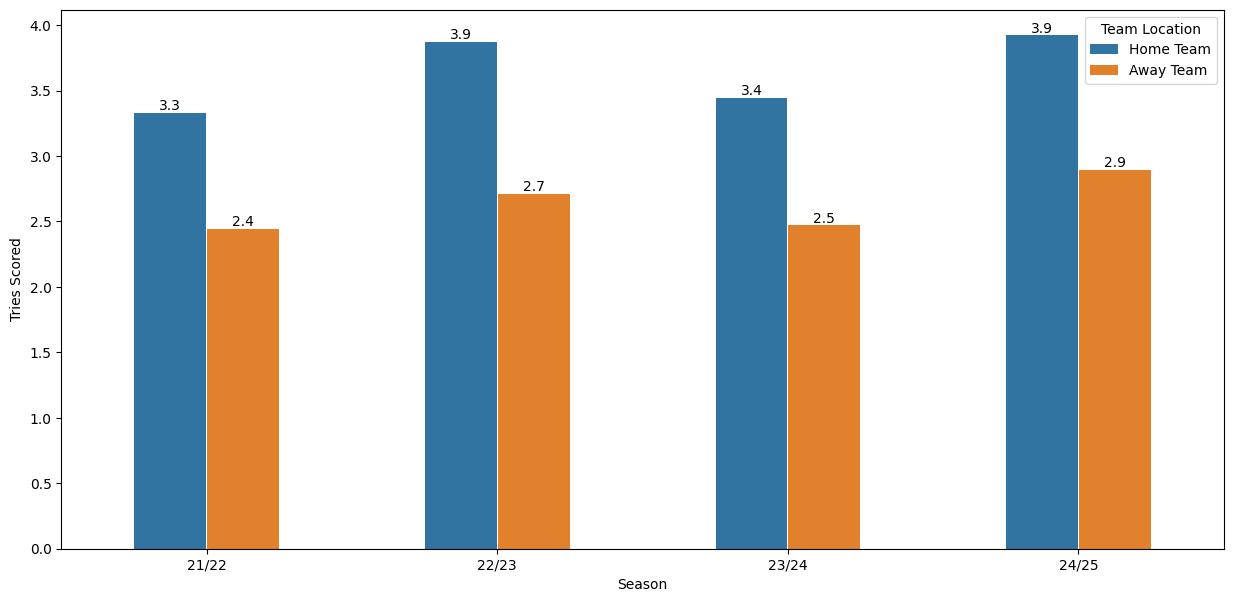

In [11]:
# create a subplot with 2 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))
# plt.grid(True)
sns.barplot(x="Season", hue="Team Location", y="Tries Scored", 
            data=df, 
            errorbar=None, 
            fill=True,
            gap=0.01,
           width=0.5)

bars_0 = ax.containers[0]
ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues])

bars_1 = ax.containers[1]
ax.bar_label(bars_1, labels=[f'{value:.1f}' for value in bars_1.datavalues])

plt.show()

In [16]:
df.groupby(["Season", "Team"])['Tries Scored'].sum().tail(16)

Season  Team     
24/25   BENETTON     14.0
        BULLS        17.0
        CARDIFF      17.0
        CONNACHT     19.0
        DRAGONS      12.0
        EDINBURGH    18.0
        GLASGOW      26.0
        LEINSTER     25.0
        LIONS        16.0
        MUNSTER      19.0
        OSPREYS      11.0
        SCARLETS     12.0
        SHARKS       12.0
        STORMERS     11.0
        ULSTER       21.0
        ZEBRE         9.0
Name: Tries Scored, dtype: float64

In [14]:
df.groupby(["Season"])['Tries Scored'].sum().tail(32)

Season
21/22    872.0
22/23    994.0
23/24    893.0
24/25    259.0
Name: Tries Scored, dtype: float64

In [102]:
df.loc[(df['Team']=='EDINBURGH') & (df['Season']=='24/25')]
# edin scored 5 tries v leinster but coming up as 4 - number 23 scored a 
# try but maybe not counted as last row in table

,Primary Key,Match Date,Team,Opponents,Tries Scored,Team Location,Season
907,EDINBURGH_LEINSTER_2024-09-20,2024-09-20,EDINBURGH,LEINSTER,4.0,Home Team,24/25
929,BULLS_EDINBURGH_2024-09-28,2024-09-28,EDINBURGH,BULLS,1.0,Away Team,24/25
947,LIONS_EDINBURGH_2024-10-05,2024-10-05,EDINBURGH,LIONS,3.0,Away Team,24/25
954,EDINBURGH_STORMERS_2024-10-12,2024-10-12,EDINBURGH,STORMERS,5.0,Home Team,24/25
973,EDINBURGH_CARDIFF_2024-10-19,2024-10-19,EDINBURGH,CARDIFF,4.0,Home Team,24/25


In [103]:
df.loc[(df['Team']=='LEINSTER') & (df['Season']=='24/25')]
# lein scored 6 tries v leinster but coming up as 4 - number 23 scored a 
# try but maybe not counted as last row in table

,Primary Key,Match Date,Team,Opponents,Tries Scored,Team Location,Season
909,EDINBURGH_LEINSTER_2024-09-20,2024-09-20,LEINSTER,EDINBURGH,5.0,Away Team,24/25
918,LEINSTER_DRAGONS_2024-09-27,2024-09-27,LEINSTER,DRAGONS,5.0,Home Team,24/25
949,BENETTON_LEINSTER_2024-10-05,2024-10-05,LEINSTER,BENETTON,4.0,Away Team,24/25
955,LEINSTER_MUNSTER_2024-10-12,2024-10-12,LEINSTER,MUNSTER,4.0,Home Team,24/25
978,CONNACHT_LEINSTER_2024-10-19,2024-10-19,LEINSTER,CONNACHT,5.0,Away Team,24/25


In [13]:
df.loc[(df['Team']=='LEINSTER') & (df['Season']=='24/25')]
# lein scored 6 tries v leinster but coming up as 4 - number 23 scored a 
# try but maybe not counted as last row in table

,Primary Key,Match Date,Team,Opponents,Tries Scored,Team Location,Season
909,EDINBURGH_LEINSTER_2024-09-20,2024-09-20,LEINSTER,EDINBURGH,5.0,Away Team,24/25
918,LEINSTER_DRAGONS_2024-09-27,2024-09-27,LEINSTER,DRAGONS,6.0,Home Team,24/25
949,BENETTON_LEINSTER_2024-10-05,2024-10-05,LEINSTER,BENETTON,5.0,Away Team,24/25
955,LEINSTER_MUNSTER_2024-10-12,2024-10-12,LEINSTER,MUNSTER,4.0,Home Team,24/25
978,CONNACHT_LEINSTER_2024-10-19,2024-10-19,LEINSTER,CONNACHT,5.0,Away Team,24/25
